### Imports and Definitions

In [1]:
from glob import glob
from gzip import open as gopen
from matplotlib import rcParams
from matplotlib.lines import Line2D
from os import makedirs
from seaborn import boxenplot,pointplot,regplot,set_context,set_style,violinplot
import matplotlib.pyplot as plt
FIGDIR = '../figs'; makedirs(FIGDIR, exist_ok=True)
set_context("paper", rc={"font.size":12,"axes.titlesize":16,"axes.labelsize":14,"legend.fontsize":10,"xtick.labelsize":10,"ytick.labelsize":10})
set_style("ticks")
rcParams['font.family'] = 'serif'
linestyle = {
    'mafft': '--',
    'viralmsa': '-',
}
color = {
    'mafft': 'red',
    'viralmsa': 'blue',
}
translate = {
    'mafft': 'MAFFT',
    'viralmsa': 'ViralMSA',
    'EBOLA': 'Ebola',
    'HCV': 'HCV',
    'HIV1': 'HIV-1',
    'SARSCOV2': 'SARS-CoV-2',
}

In [2]:
def get_user_time(fn):
    lines = [l.strip() for l in open(fn).read().strip().splitlines()]
    if len(lines) == 3:
        user_time = lines[1].split('\t')[1]
        m = float(user_time.split('m')[0]); s = float(user_time.split('m')[1].split('s')[0])
        return m*60 + s
    else:
        return float(lines[0].split('user')[0])

In [3]:
def parse_tn93(fn):
    if fn.lower().endswith('.gz'):
        data = [l.strip() for l in gopen(fn).read().decode().strip().splitlines() if not l.startswith('ID1,') and l.count(',') == 2]
    else:
        data = [l.strip() for l in open(fn) if not l.startswith('ID1,') and l.count(',') == 2]
    dm = dict()
    for l in data:
        u,v,d = l.split(','); u = u.strip(); v = v.strip(); d = float(d)
        if u not in dm:
            dm[u] = dict()
        if v not in dm:
            dm[v] = dict()
        dm[u][v] = dm[v][u] = d
    IDs = list(dm.keys())
    for u in IDs:
        dm[u][u] = 0
    return dm

### Execution Time vs. Number of Sequences

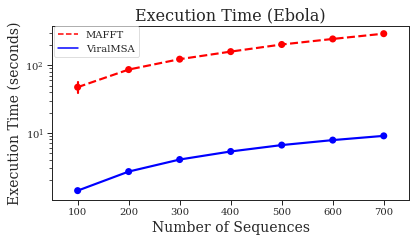

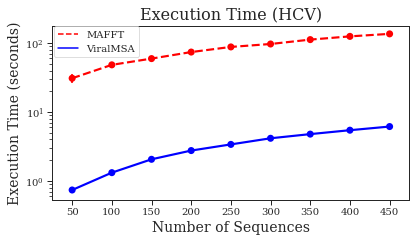

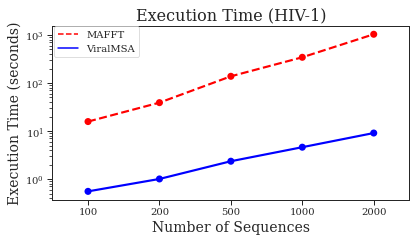

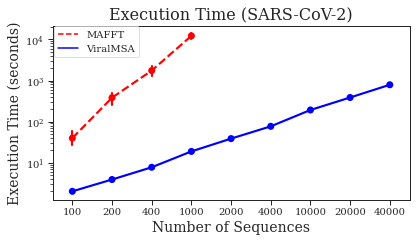

In [4]:
for v in ['EBOLA', 'HCV', 'HIV1', 'SARSCOV2']:
    fig = plt.figure(figsize=(6.4,3.2))
    for m in ['mafft', 'viralmsa']:
        x = list(); y = list()
        for n in sorted(int(d.split('/')[-1]) for d in glob('../data/%s/*0' % v)):
            for fn in glob('../data/%s/%d/%d.*.%s.time.txt' % (v,n,n,m)):
                x.append(n); y.append(get_user_time(fn))
        if len(x) == 0:
            continue
        pointplot(x=x, y=y, color=color[m], linestyles=linestyle[m])
        #boxenplot(x=x, y=y, color=color[m])#, linestyles=linestyle[m])
    plt.yscale('log')
    plt.title("Execution Time (%s)" % translate[v])
    plt.xlabel("Number of Sequences")
    plt.ylabel("Execution Time (seconds)")
    handles = [Line2D([0],[0],color=color[m],label=translate[m],linestyle=linestyle[m],linewidth=1.5) for m in ['mafft','viralmsa']]
    legend = plt.legend(handles=handles,bbox_to_anchor=(0.005, 0.995), loc='upper left', borderaxespad=0., frameon=True)
    fig.savefig('%s/%s.runtime.pdf' % (FIGDIR,v), format='pdf', bbox_inches='tight')

### Accuracy Spearman and Pearson Correlation of Mantel Test of TN93 Distances

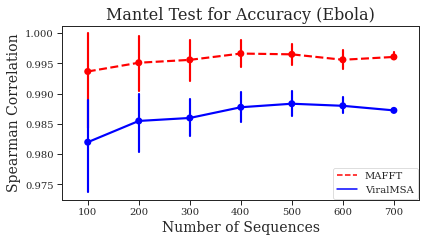

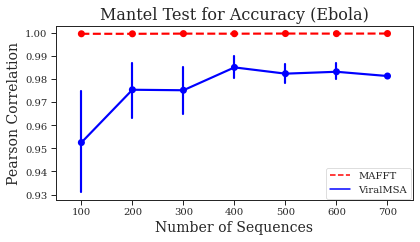

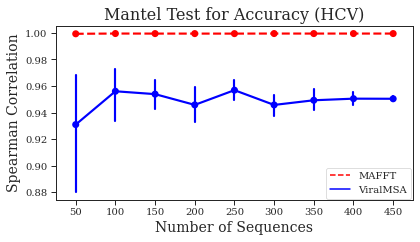

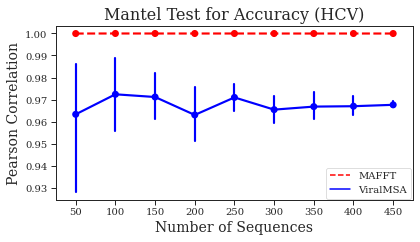

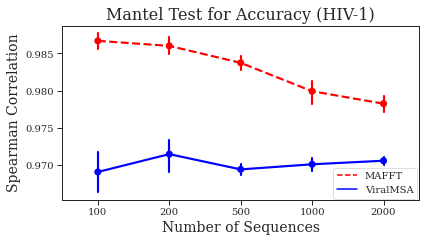

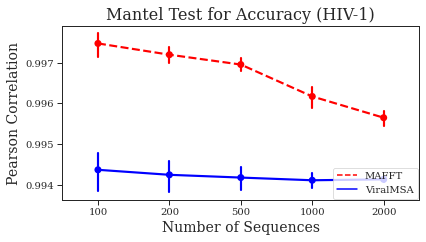

In [5]:
for v in ['EBOLA', 'HCV', 'HIV1']:
    for c in ['spearman','pearson']:
        fig = plt.figure(figsize=(6.4,3.2))
        for m in ['mafft', 'viralmsa']:
            x = list(); y = list()
            for n in sorted(int(d.split('/')[-1]) for d in glob('../data/%s/*0' % v)):
                for fn in glob('../data/%s/%d/%d.*.%s.tn93.mantel.%s.txt' % (v,n,n,m,c)):
                    x.append(n); y.append(float(open(fn).read().split(':')[1]))
            pointplot(x=x, y=y, color=color[m], linestyles=linestyle[m])
            #boxenplot(x=x, y=y, color=color[m])#, linestyles=linestyle[m])
        #plt.ylim(ymin=0.9)
        plt.title("Mantel Test for Accuracy (%s)" % translate[v])
        plt.xlabel("Number of Sequences")
        plt.ylabel("%s Correlation" % c.capitalize())
        handles = [Line2D([0],[0],color=color[m],label=translate[m],linestyle=linestyle[m],linewidth=1.5) for m in ['mafft','viralmsa']]
        legend = plt.legend(handles=handles,bbox_to_anchor=(0.995, 0.005), loc='lower right', borderaxespad=0., frameon=True)
        fig.savefig('%s/%s.mantel.accuracy.%s.pdf'%(FIGDIR,v,c), format='pdf', bbox_inches='tight')

### Agreement Spearman and Pearson Correlation of Mantel Test of TN93 Distances

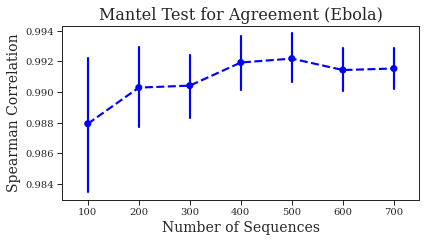

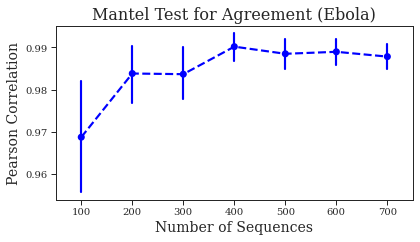

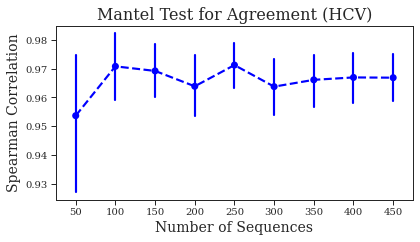

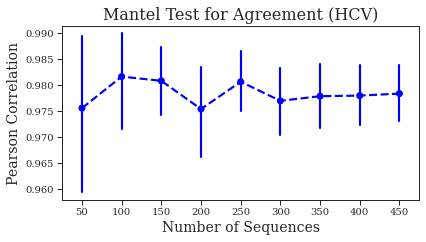

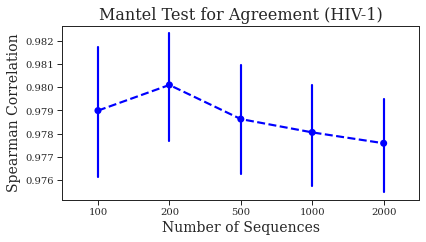

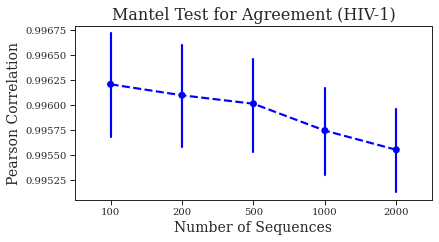

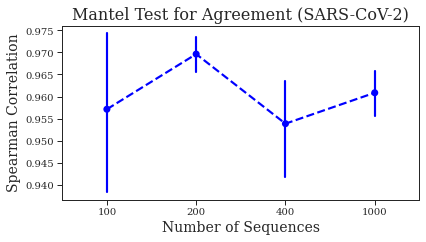

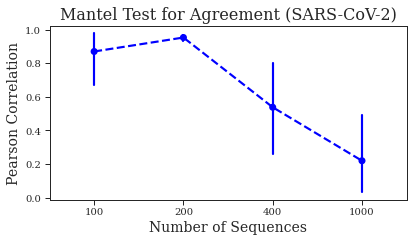

In [10]:
for v in ['EBOLA', 'HCV', 'HIV1', 'SARSCOV2']:
    for c in ['spearman','pearson']:
        fig = plt.figure(figsize=(6.4,3.2))
        x = list(); y = list()
        for n in sorted(int(d.split('/')[-1]) for d in glob('../data/%s/*0' % v)):
            for fn in glob('../data/%s/%d/%d.*.tn93.mantel.%s.txt' % (v,n,n,c)):
                x.append(n); y.append(float(open(fn).read().split(':')[1]))
        pointplot(x=x, y=y, color='blue', linestyles=linestyle[m])
        #boxenplot(x=x, y=y, color=color[m])#, linestyles=linestyle[m])
        #plt.ylim(ymin=0.9)
        plt.title("Mantel Test for Agreement (%s)" % translate[v])
        plt.xlabel("Number of Sequences")
        plt.ylabel("%s Correlation" % c.capitalize())
        #legend = plt.legend(handles=handles,bbox_to_anchor=(0.995, 0.005), loc='lower right', borderaxespad=0., frameon=True)
        fig.savefig('%s/%s.mantel.agreement.%s.pdf'%(FIGDIR,v,c), format='pdf', bbox_inches='tight')

### True vs. Estimated Pairwise Distances

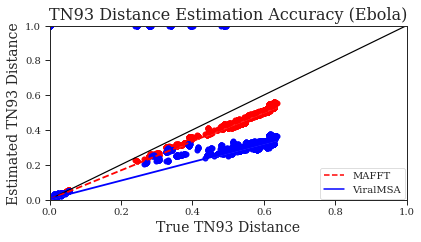

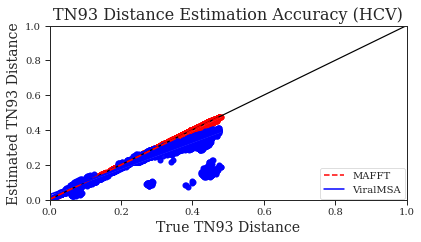

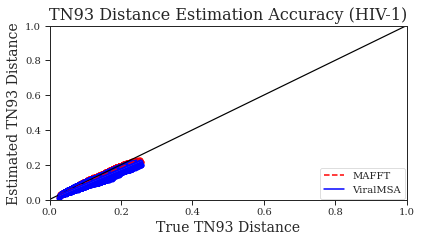

In [20]:
for v in ['EBOLA', 'HCV', 'HIV1']:
    fig = plt.figure(figsize=(6.4,3.2))
    plt.plot([0,1], [0,1], color='black')
    dm_true = parse_tn93('../data/%s/full/full.true.tn93.csv.gz' % v)
    for m in ['mafft', 'viralmsa']:
        dm_est = parse_tn93('../data/%s/full/full.%s.tn93.csv.gz' % (v,m))
        x = list(); y = list()
        for person1 in dm_true:
            for person2 in dm_true:
                if person1 == person2:
                    continue
                x.append(dm_true[person1][person2])
                if person1 in dm_est and person2 in dm_est[person1]:
                    y.append(dm_est[person1][person2])
                else:
                    y.append(1)
        regplot(x=x, y=y, color=color[m], line_kws={'linestyle':linestyle[m]})
    plt.xlim(xmin=0, xmax=1)
    plt.ylim(ymin=0, ymax=1)
    plt.title("TN93 Distance Estimation Accuracy (%s)" % translate[v])
    plt.xlabel("True TN93 Distance")
    plt.ylabel("Estimated TN93 Distance")
    handles = [Line2D([0],[0],color=color[m],label=translate[m],linestyle=linestyle[m],linewidth=1.5) for m in ['mafft','viralmsa']]
    legend = plt.legend(handles=handles,bbox_to_anchor=(0.995, 0.005), loc='lower right', borderaxespad=0., frameon=True)
    fig.savefig('%s/%s.distance.accuracy.pdf'%(FIGDIR,v), format='pdf', bbox_inches='tight')